# Data Structures

In [10]:
from LinkedLists import LinkedList, SortedList
from Trees import BinarySearchTree, AVLTree, KDTree

import numpy as np
from time import time
from random import sample

from matplotlib import rcParams, pyplot as plt
%matplotlib inline
rcParams["figure.figsize"] = (16,8)

### Timing

Having a variety of data structures available to store, access, and sort data is an essential part of data analysis and maintenance because different data structures have different pros and cons.
We can easily compare the build and search speeds of the `LinkedList`, `BST`, and `AVL` classes.

In [19]:
def time_operation(data, structure, operation):
    """Return the time it takes to perform the given operation on the
    provided structure for each item in the provided set of data.
    """
    start = time()
    for item in data:
        operation(item)
    return time() - start

def time_structures(dataset, domain):

    # Initialize lists to hold results
    dls_build, dls_search = [], []
    sls_build, sls_search = [], []
    bst_build, bst_search = [], []
    avl_build, avl_search = [], []

    for n in domain:

        # Initialize the data subset and the data structures.
        subset = sample(dataset, n)
        dls, sls = LinkedList(), SortedList()
        bst, avl = BinarySearchTree(), AVLTree()

        # Time the builds.
        dls_build.append(time_operation(subset, dls, dls.append))
        sls_build.append(time_operation(subset, sls, sls.append))
        bst_build.append(time_operation(subset, bst, bst.insert))
        avl_build.append(time_operation(subset, avl, avl.insert))

        # Time the searches.
        random_subset = sample(subset, 15)
        dls_search.append(time_operation(subset, dls, dls._find))
        sls_search.append(time_operation(subset, sls, sls._find))
        bst_search.append(time_operation(subset, bst, bst.find))
        avl_search.append(time_operation(subset, avl, avl.find))

    # Plot the results.
    plt.subplot(121)
    plt.title("Build Times")
    for structure, name in [(dls_build, "Doubly Linked List"), (sls_build, "Sorted Linked List"),
                            (bst_build, "Binary Search Tree"), (avl_build, "AVL Tree")]:
        plt.loglog(domain, structure, '.-', lw=2, ms=10, basex=2, basey=2, label=name)
    plt.xlabel("Size of data set")
    plt.ylabel("Seconds")
    plt.legend(loc='upper left')

    plt.subplot(122)
    plt.title("Search Times")
    for structure, name in [(dls_search, "Doubly Linked List"), (sls_search, "Sorted Linked List"),
                            (bst_search, "Binary Search Tree"), (avl_search, "AVL Tree")]:
        plt.loglog(domain, structure, '.-', lw=2, ms=10, basex=2, basey=2, label=name)
    plt.xlabel("Size of data set")
    plt.legend(loc='upper left')
    plt.show()



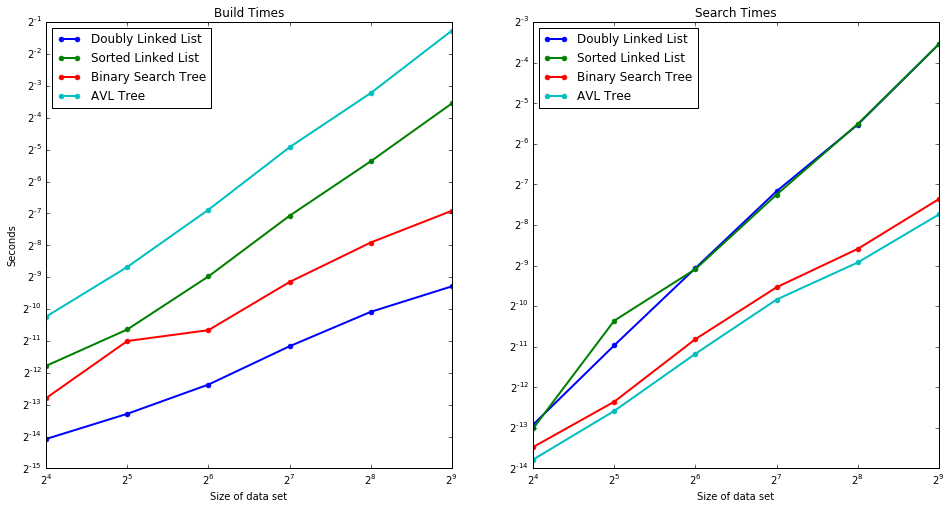

In [22]:
N = 9

dataset = np.random.random(2**(N+1))
domain = 2**np.arange(4,N+1)

time_structures(dataset, domain)

### The Curse of Dimensionality
Working with multidimensional data can problematic because of the so-called _curse of dimensionality_.
As the dimension of the data increases, the execution time of many algorithms experiences a sudden exponential jump.
To demonstrate this phenomenon, we use the `KDTree` class to solve the nearest neighbor problem, increasing the dimensionality of the data set.

In [ ]:
# TODO: Nearest neighbor with homegrown KDT.